<a href="https://colab.research.google.com/github/CrucifierBladex/letter_recognition_uciml/blob/main/Letter_Recognition_deepL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df=pd.read_csv('/content/letter-recognition.data')
import seaborn as sns
sns.heatmap(df.corr(),annot=True)








In [23]:
df.corr()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
T,1.000000,0.105400,0.001535,0.096867,0.041679,-0.002616,-0.049662,0.308866,-0.109890,0.012260,-0.077267,0.389388,-0.140926,0.095948,0.336902,-0.056520,-0.183475
2,0.105400,1.000000,0.757831,0.851506,0.672774,0.619074,-0.032567,0.045678,0.014217,0.052106,0.148015,0.035538,-0.046333,0.489120,0.098171,0.273450,-0.105144
8,0.001535,0.757831,1.000000,0.671947,0.823212,0.555103,0.045682,-0.040966,-0.024996,0.096473,0.159971,-0.054671,-0.007568,0.274463,-0.001333,0.230917,-0.042743
3,0.096867,0.851506,0.671947,1.000000,0.660225,0.765702,0.061989,0.024960,-0.098711,0.057094,0.114976,0.011766,-0.045008,0.557221,0.045647,0.260230,-0.118270
5,0.041679,0.672774,0.823212,0.660225,1.000000,0.644378,0.042849,-0.020055,0.082375,0.059035,0.012450,-0.011981,0.026387,0.265244,0.025357,0.297549,-0.018852
1,-0.002616,0.619074,0.555103,0.765702,0.644378,1.000000,0.139196,-0.028692,-0.012084,-0.065540,-0.069833,-0.072870,-0.038857,0.627479,0.017637,0.492612,-0.062964
8.1,-0.049662,-0.032567,0.045682,0.061989,0.042849,0.139196,1.000000,-0.356697,-0.053264,-0.122861,0.085991,-0.342012,-0.032116,0.144368,-0.253335,0.127103,0.248815
13,0.308866,0.045678,-0.040966,0.024960,-0.020055,-0.028692,-0.356697,1.000000,-0.118447,-0.049706,0.178455,0.600349,-0.271691,-0.036574,0.555164,-0.077853,-0.207943
0,-0.109890,0.014217,-0.024996,-0.098711,0.082375,-0.012084,-0.053264,-0.118447,1.000000,-0.188416,-0.317889,0.042666,0.082029,0.142036,-0.084846,0.006423,0.182926
6,0.012260,0.052106,0.096473,0.057094,0.059035,-0.065540,-0.122861,-0.049706,-0.188416,1.000000,0.132019,-0.060143,0.119048,-0.384013,-0.052541,0.277580,-0.061337


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   T       19999 non-null  int64
 1   2       19999 non-null  int64
 2   8       19999 non-null  int64
 3   3       19999 non-null  int64
 4   5       19999 non-null  int64
 5   1       19999 non-null  int64
 6   8.1     19999 non-null  int64
 7   13      19999 non-null  int64
 8   0       19999 non-null  int64
 9   6       19999 non-null  int64
 10  6.1     19999 non-null  int64
 11  10      19999 non-null  int64
 12  8.2     19999 non-null  int64
 13  0.1     19999 non-null  int64
 14  8.3     19999 non-null  int64
 15  0.2     19999 non-null  int64
 16  8.4     19999 non-null  int64
dtypes: int64(17)
memory usage: 2.6 MB


In [26]:
df.describe()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.00000
mean,12.516426,4.023651,7.035452,5.121956,5.372469,3.505975,6.897545,7.500175,4.628831,5.178609,8.282164,6.453823,7.928996,3.046252,8.338867,3.691935,7.80119
std,7.502223,1.913206,3.304631,2.014568,2.261445,2.190441,2.026071,2.325087,2.699837,2.380875,2.488485,2.631016,2.080671,2.332500,1.546759,2.567004,1.61751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,6.000000,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,13.000000,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,19.000000,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.00000
max,25.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000


In [27]:
df.isnull().sum()

T      0
2      0
8      0
3      0
5      0
1      0
8.1    0
13     0
0      0
6      0
6.1    0
10     0
8.2    0
0.1    0
8.3    0
0.2    0
8.4    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scaler=StandardScaler()
encoder=LabelEncoder()
df['T']=encoder.fit_transform(df['T'])
from sklearn.model_selection import train_test_split
x=df.drop(['T'],axis=1)
y=df['T'].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_=y.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)
x_train,y_train=scaler.fit_transform(x_train),scaler.fit_transform(y_train)

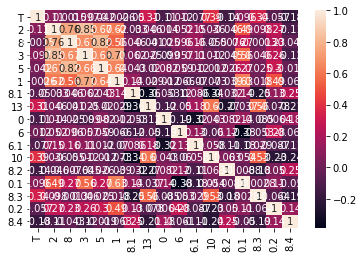

In [20]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)


In [12]:
x_train.shape,x_test.shape




((15999, 16), (15999, 26))

In [13]:
from keras.models import *
from keras.layers import *
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(16,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,x_test,epochs=50,validation_data=(y_train,y_test))

Epoch 1/50
500/500 [==============================] - 1s 2ms/step - loss: 1.6676 - accuracy: 0.5067 - val_loss: 0.7926 - val_accuracy: 0.7700
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.8130 - accuracy: 0.7512 - val_loss: 0.5632 - val_accuracy: 0.8282
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6258 - accuracy: 0.8055 - val_loss: 0.4354 - val_accuracy: 0.8675
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5152 - accuracy: 0.8393 - val_loss: 0.3770 - val_accuracy: 0.8848
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.4347 - accuracy: 0.8646 - val_loss: 0.3250 - val_accuracy: 0.8972
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3906 - accuracy: 0.8772 - val_loss: 0.3103 - val_accuracy: 0.9018
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8879 - val_loss: 0.2585 - val_accuracy: 0.9227
Epoch 

In [14]:
df_out=pd.DataFrame(history.history)
df_out

,loss,accuracy,val_loss,val_accuracy
0,1.667611,0.506719,0.792594,0.77000
1,0.812967,0.751172,0.563167,0.82825
2,0.625759,0.805488,0.435413,0.86750
3,0.515179,0.839302,0.377015,0.88475
4,0.434725,0.864617,0.324964,0.89725
5,0.390599,0.877242,0.310312,0.90175
6,0.354182,0.887868,0.258503,0.92275
7,0.318303,0.900619,0.242353,0.92775
8,0.294844,0.905994,0.224165,0.93050
9,0.269086,0.915057,0.208709,0.93825


In [18]:
import plotly.express as px
fig=px.line(x=range(50),y=df_out['loss'],labels={'x':'epochs','y':'training_loss'})
fig.show()

In [19]:
fig=px.line(x=range(50),y=df_out['val_loss'],labels={'x':'epochs','y':'val_loss'})
fig.show()

In [22]:
fig=px.line(x=range(50),y=df_out['val_accuracy'],labels={'x':'epochs','y':'val_acc'})
fig.show()